# Portfolio assignment 12
Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import seaborn as sns

In [2]:
data = pd.read_csv('4.data.txt')
data.shape

(467, 34)

### Include age, p_income and pov

In [3]:
data = data[data.age !=  'Unknown']
data['age'] = data.age.astype(float)

In [4]:
data = data[data.p_income !=  '-']
data['p_income'] = data.p_income.astype(float)

In [5]:
data = data[data.pov !=  '-']
data['pov'] = data.pov.astype(float)

### Means of column Gender

In [6]:
data.groupby('gender').mean()

,age,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
gender,,,,,,,,,,,,,,,,,,,,
Female,35.571429,18.904762,2015.0,36.926622,-99.142006,21.095238,60.428571,110688.000000,2.115578e+10,21155.666667,4511.142857,25443.000000,55483.095238,62664.904762,0.879604,2.285714,2.952381,19.347619,0.114175,0.297701
Male,37.386364,15.697727,2015.0,36.426497,-96.926090,25.315909,90.452273,234707.384091,2.540660e+10,25406.361364,4789.725000,24256.920455,46163.825000,52117.520455,0.894652,2.489157,2.470455,21.224545,0.118054,0.217619


Most of the numbers above are meaningless. Calculating the mean from id's like geo_id, county_id or state_fp does not result in useful data. But let's take a look at the interesting fields.

*The numbers below are rounded
- Between male and female is the age quite close: 35.6 and 37.5. 
- They come from tracts with nearly identical population: 4500 and 4800 inhabitants.
- There personal income does not differ much, both genders around \\$25.000 with a max deviation of \\$750.
- There is a surpisingly big difference in there household income: \\$55.500 and \\$46.200. 
- Female victims come from tracts with a higher college degree

### Barplots

<AxesSubplot:xlabel='gender', ylabel='age'>

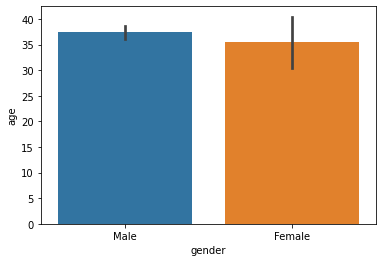

In [7]:
sns.barplot(ci=95, x='gender', y='age', data=data)

In this barplot the confidence interval immediately stands out. It could be that the age of female victims has a broader range than the male victims, but the mean is both between 35 and 40, which is not far apart. 

My guess here is the amount of data. We have 467 data points, but maybe we have more data of male victims than of female victims. Let's test this.

In [8]:
data.groupby('gender').size()

gender
Female     21
Male      440
dtype: int64

The theory proved true, we have way more male victims than female. So we the female confidence interval wil have a higher range in all coming barplots.

#### Tract-level household income

<AxesSubplot:xlabel='gender', ylabel='h_income'>

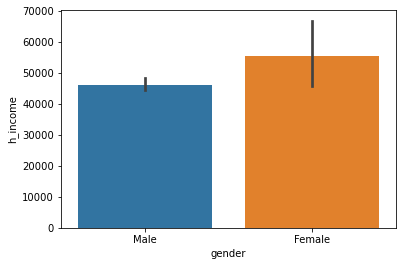

In [12]:
sns.barplot(ci=95, x='gender', y='h_income', data=data)

It looks like female  victims come from an household with, on average, a higher income. But because the confidence intervals overlap we cannot be sure about how big the difference is. 

#### Share of 25+ pop with BA or higher	

<AxesSubplot:xlabel='gender', ylabel='college'>

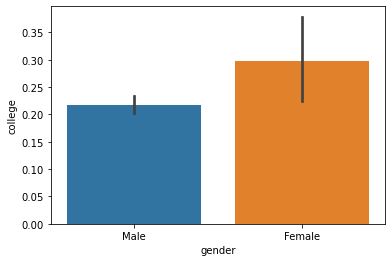

In [11]:
sns.barplot(ci=95, x='gender', y='college', data=data)

The female victims come from tracts with a higher education degree. Again, because of the long confidence interval, we cannot say something about how big the difference is.

If we compare this barplot with the previous results it looks like policeofficers target rich and educated woman. But maybe they drive better cars and are therefore more likely to be targeted by police? Or do they take more risk in general? Maybe this data just is not correct, I have no clue.